In [13]:
import pandas as pd

def transform_method_data(input_file):
    """Transform CSV data to method-per-row format."""
    
    df = pd.read_csv(input_file)
    
    methods = ['N1', 'N2', 'N3', 'EM', 'PD', 'Nahmias', 'Conrad', 
               'Agrawal', 'Bayesian_POS', 'Baseline']
    
    transformed_data = []
    
    for method in methods:
        overest = df[f"{method}_overestimation_rate"].mean()
        underest = df[f"{method}_underestimation_rate"].mean()
        accuracy = df[f"{method}_accuracy"].mean()
        
        transformed_data.append({
            'method': method,
            'overestimation_rate': overest,
            'underestimation_rate': underest,
            'accuracy': accuracy,
            'rate_difference': overest - underest
        })
    
    return pd.DataFrame(transformed_data)


result_df = transform_method_data('Best/Uncensoring_DT_Input copy.csv')

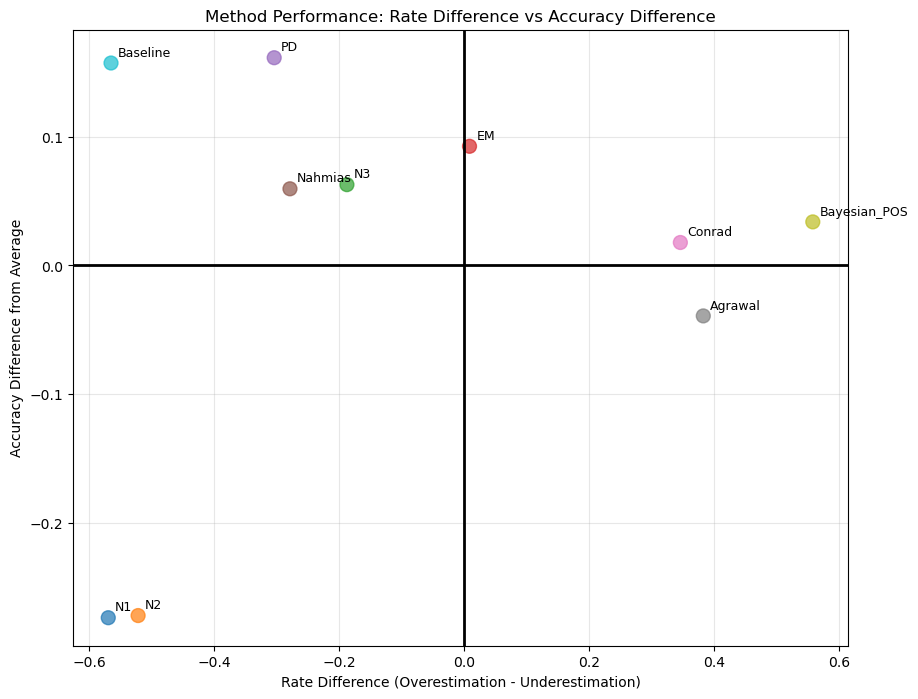

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_methods(result_df):
    # Calculate accuracy difference from average
    avg_accuracy = result_df['accuracy'].mean()
    accuracy_diff = result_df['accuracy'] - avg_accuracy
    
    plt.figure(figsize=(10, 8))
    
    # Create scatter plot
    plt.scatter(result_df['rate_difference'], accuracy_diff, 
                s=100, alpha=0.7, c=range(len(result_df)), cmap='tab10')
    
    # Add method labels next to each point
    for i, method in enumerate(result_df['method']):
        plt.annotate(method, 
                    (result_df['rate_difference'].iloc[i], accuracy_diff.iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    # Add quadrant lines
    plt.axhline(y=0, color='black', linewidth=2)
    plt.axvline(x=0, color='black', linewidth=2)
    
    plt.xlabel('Rate Difference (Overestimation - Underestimation)')
    plt.ylabel('Accuracy Difference from Average')
    plt.title('Method Performance: Rate Difference vs Accuracy Difference')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_methods(result_df)